<a href="https://colab.research.google.com/github/tvml/ml2425/blob/master/codici/eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
import numpy as np
from skimage.io import imshow
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [8]:
def plot_gallery(images, h, w, n_row=3, n_col=4, titles=None):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [9]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.8)

In [10]:
lfw_people.images.shape

(1288, 100, 75)

In [11]:
n_samples, h, w = lfw_people.images.shape

In [12]:
X = lfw_people.data

In [13]:
X.shape

(1288, 7500)

In [14]:
n_features = X.shape[1]

In [15]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [16]:
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print(target_names)

n_samples: 1288
n_features: 7500
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


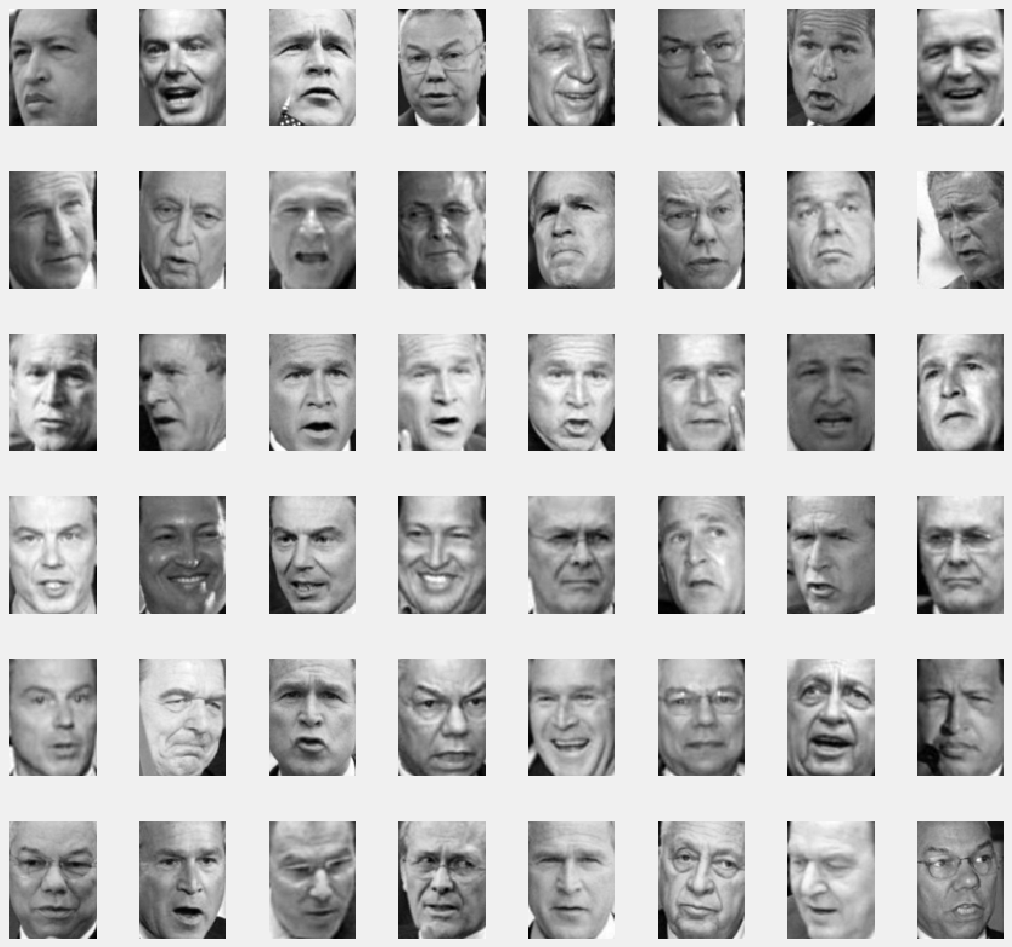

In [17]:
plot_gallery(X, h, w, n_row=6, n_col=8)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (966, 7500)
X_test: (322, 7500)


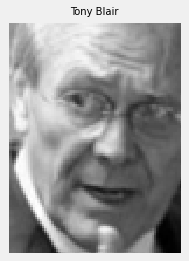

In [19]:
i = 650
plt.figure(figsize=(4,4))
plt.imshow(X_train[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title(target_names[y[i]])
plt.show()

Calcola PCA sul training set

In [20]:
n_components = 150

In [21]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [22]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [23]:
eigenfaces.shape

(150, 100, 75)

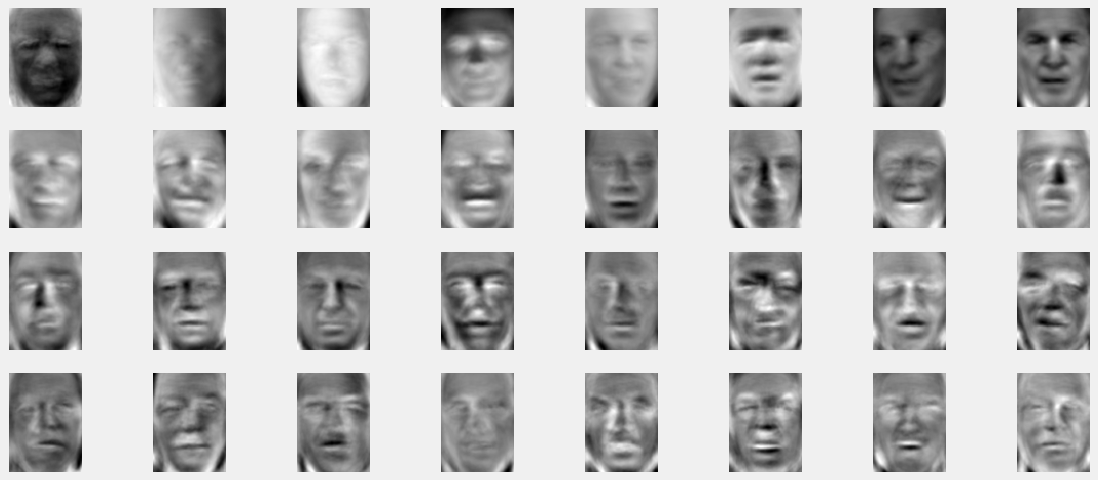

In [28]:
fig, axes = plt.subplots(4, 8, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(100, 75), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

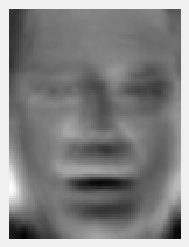

In [27]:
j = 12
plt.figure(figsize=(4,4))
plt.imshow(eigenfaces[j], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

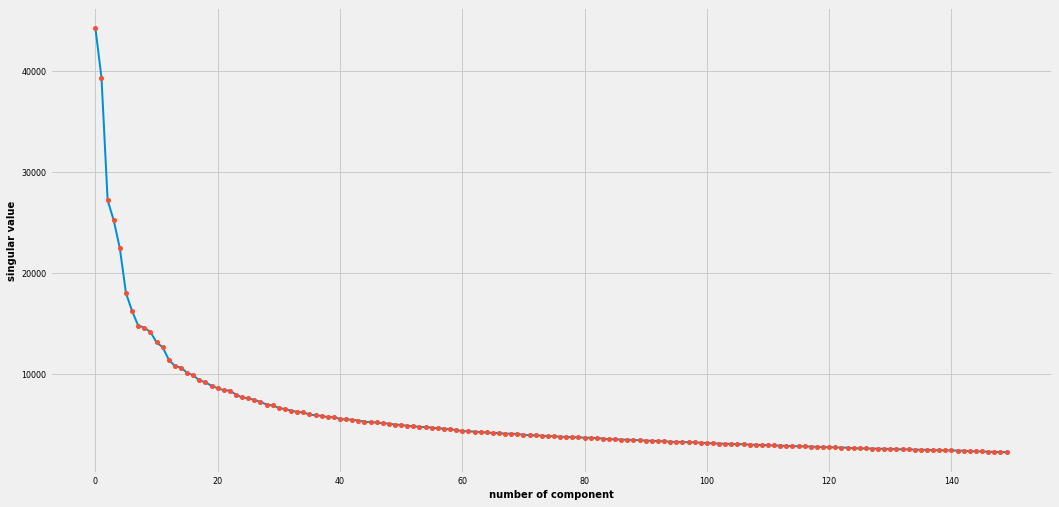

In [29]:
plt.figure(figsize=(16,8))
plt.plot(pca.singular_values_, marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of component')
plt.ylabel('singular value')
plt.show()

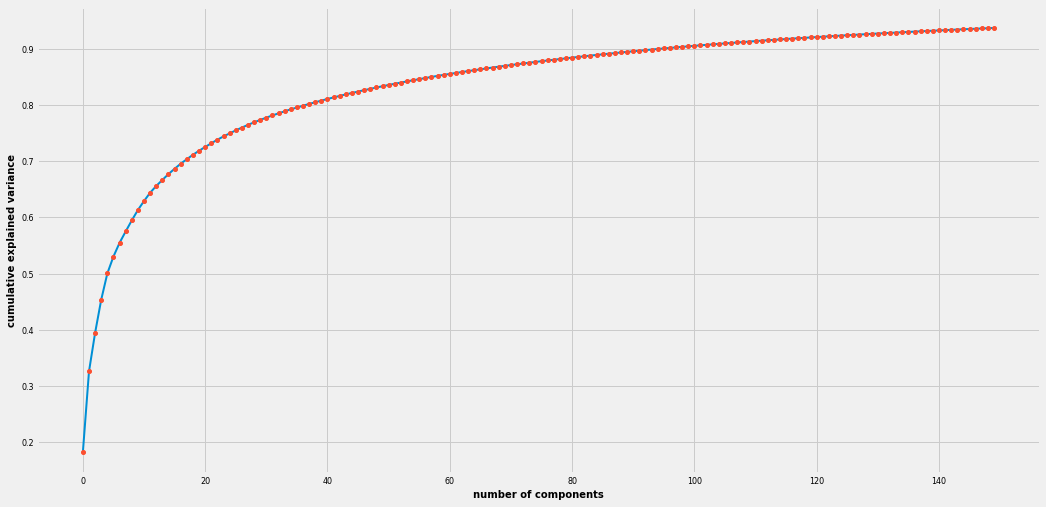

In [30]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=4, markerfacecolor=colors[1], markeredgecolor=colors[1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [31]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
X_train_rec = pca.inverse_transform(X_train_pca)

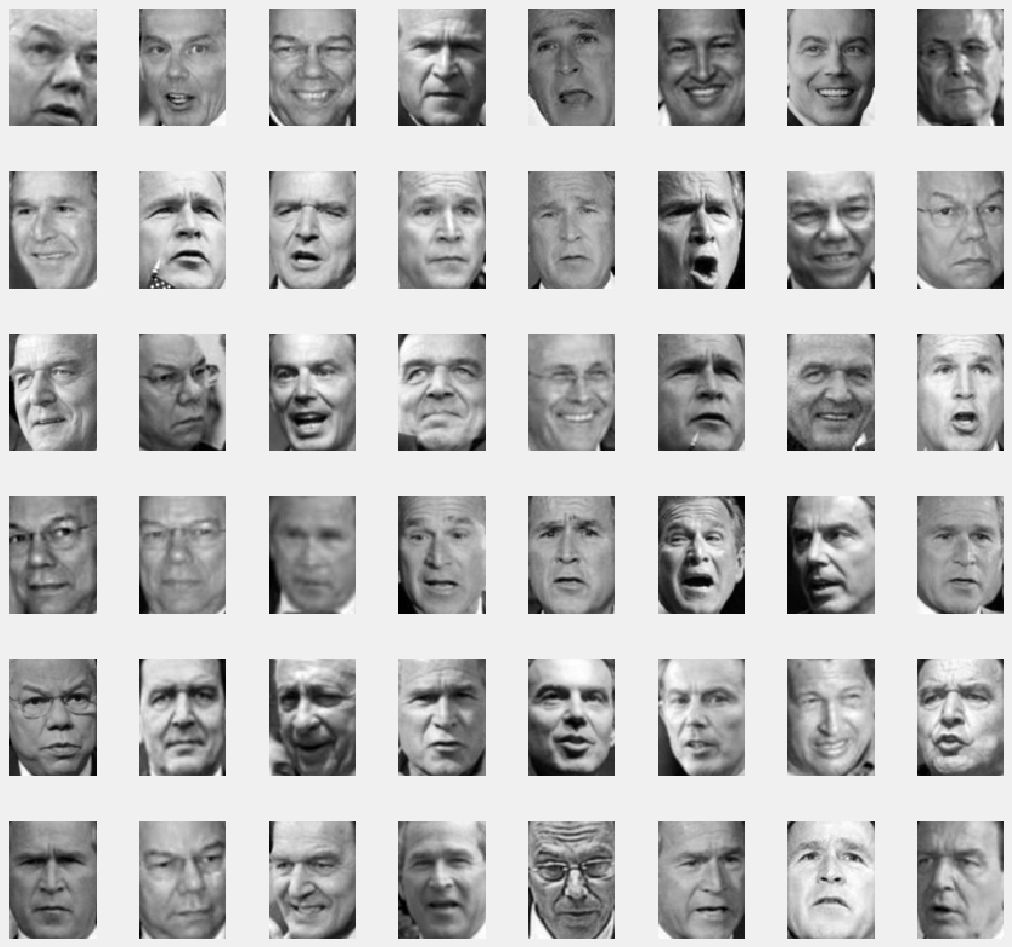

In [34]:
plot_gallery(X_train, h, w, n_row=6, n_col=8)

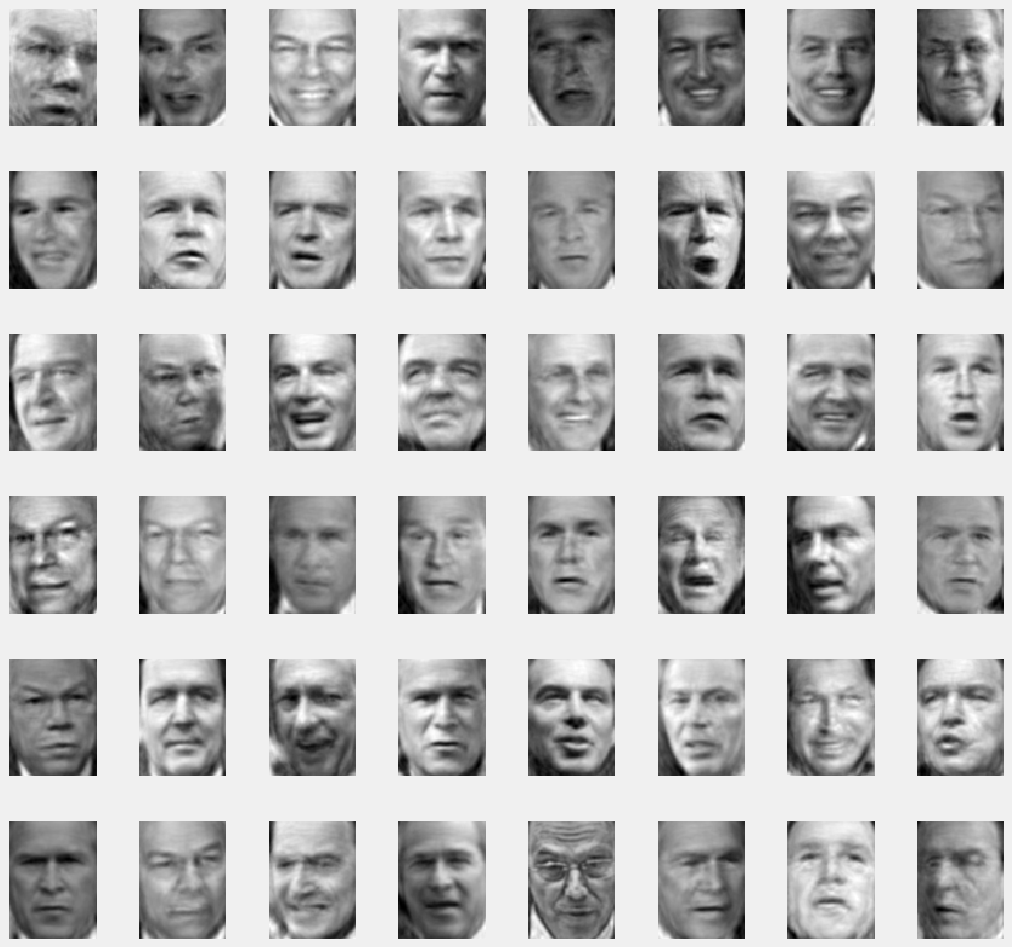

In [33]:
plot_gallery(X_train_rec, h, w, n_row=6, n_col=8)

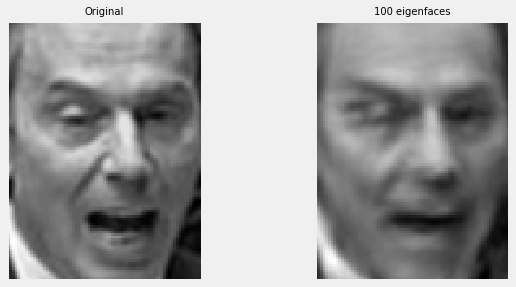

In [35]:
k = 380
ncomponents = 100
pca1 = PCA(n_components=ncomponents, svd_solver='randomized', whiten=True).fit(X_train)
f = pca1.transform(X_train[k,:].reshape(1,-1))
f1 = pca1.inverse_transform(f)

plt.figure(figsize=(8,4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(X_train[k, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.subplot(1, 2, 2)
plt.title('{0:d} eigenfaces'.format(ncomponents))
plt.imshow(f1.reshape(h,w), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [37]:
param_grid = {'C': [77, 77.5, 78],
              'gamma': [0.0017, 0.0018, 0.0019] }
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=7, scoring='accuracy')
clf = clf.fit(X_train_pca, y_train)

In [38]:
best_params = clf.best_params_
best_score = clf.best_score_
print('C = {0:5.3f}, gamma = {1:7.5f}, accuracy = {2:5.3f}'.format(best_params['C'], best_params['gamma'], best_score))

C = 77.000, gamma = 0.00170, accuracy = 0.821


In [39]:
y_pred_train = clf.predict(X_train_pca)

print(target_names)
print(confusion_matrix(y_train, y_pred_train, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_train, y_pred_train, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 58   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0]
 [  0   0  85   0   0   0   0]
 [  0   0   0 404   0   0   0]
 [  0   0   0   0  85   0   0]
 [  0   0   0   0   0  57   0]
 [  0   0   0   0   0   0 106]]
accuracy: 1.000


In [41]:
y_pred_test = clf.predict(X_test_pca)

print(target_names)
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))
print('accuracy: {0:5.3f}'.format(accuracy_score(y_test, y_pred_test, normalize=True)))

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[ 14   3   1   1   0   0   0]
 [  1  54   0   5   0   2   3]
 [  0   3  27   6   0   0   0]
 [  0   6   3 114   0   1   2]
 [  0   1   1   1  17   0   4]
 [  0   0   0   1   1  12   0]
 [  0   1   1   4   3   0  29]]
accuracy: 0.829


In [42]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

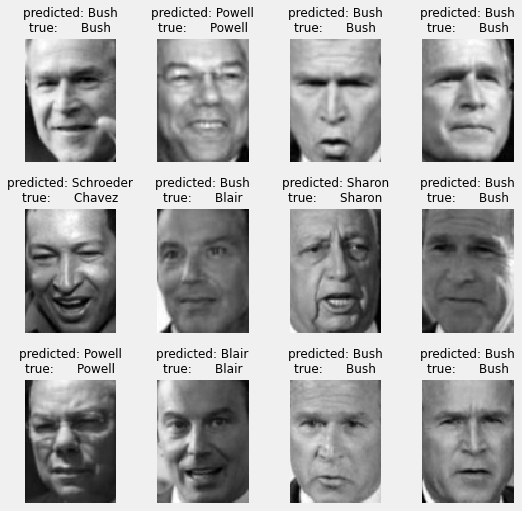

In [45]:
prediction_titles = [title(y_pred_test, y_test, target_names, i) for i in range(y_pred_test.shape[0])]

plot_gallery(X_test, h, w, titles=prediction_titles)